# INSTALL DEPENDENCIES

In [ ]:
!pip install yfinance
# Import yfinance package
import yfinance as yf
# importing needed libraries/modules
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# AMERICAN STOCKS

In [ ]:
# Set the start and end date
start_date = '1990-01-01'
end_date = '2022-07-20'

# Set the ticker
ticker = 'AMZN'

# Get the data
data_amazon = yf.download(ticker, start_date, end_date)

# Print 5 rows
data_amazon.tail()

In [ ]:
tsla = yf.Ticker("TSLA")
tsla.info


In [ ]:
hist=tsla.history(start='2022-06-15', end='2022-06-17', 
                  interval='1h', actions=False)
hist

In [ ]:
amzn=yf.Ticker('AMZN')
amzn.institutional_holders

In [ ]:
amzn.recommendations.tail(5)

# INDICES

In [ ]:
majorStockIDX = pd.Series(['^GSPC','^DJI','^IXIC','^NSEI','BSESN'])

In [ ]:
# Retrieve data from Yahoo! Finance
tickerData = yf.Ticker('^NSEI')
nifty = tickerData.history(period='1d', start='2000-1-1', end='2022-6-17')
X_nifty = nifty.index
Y_nifty = nifty['Close']

In [ ]:
tickerData = yf.Ticker('^BSESN')
sensex = tickerData.history(period='1d', start='2000-1-1', end='2022-06-18')
X_sensex = sensex.index
Y_sensex = sensex['Close']

In [ ]:
tickerData = yf.Ticker('^IXIC')
nasdaq = tickerData.history(period='1d', start='2000-1-1', end='2022-06-18')
X_nasdaq = nasdaq.index
Y_nasdaq = nasdaq['Close']

In [ ]:
tickerData = yf.Ticker('^DJI')
dow = tickerData.history(period='1d', start='2000-1-1', end='2022-06-18')
X_dow = dow.index
Y_dow = dow['Close']

<function matplotlib.pyplot.show>

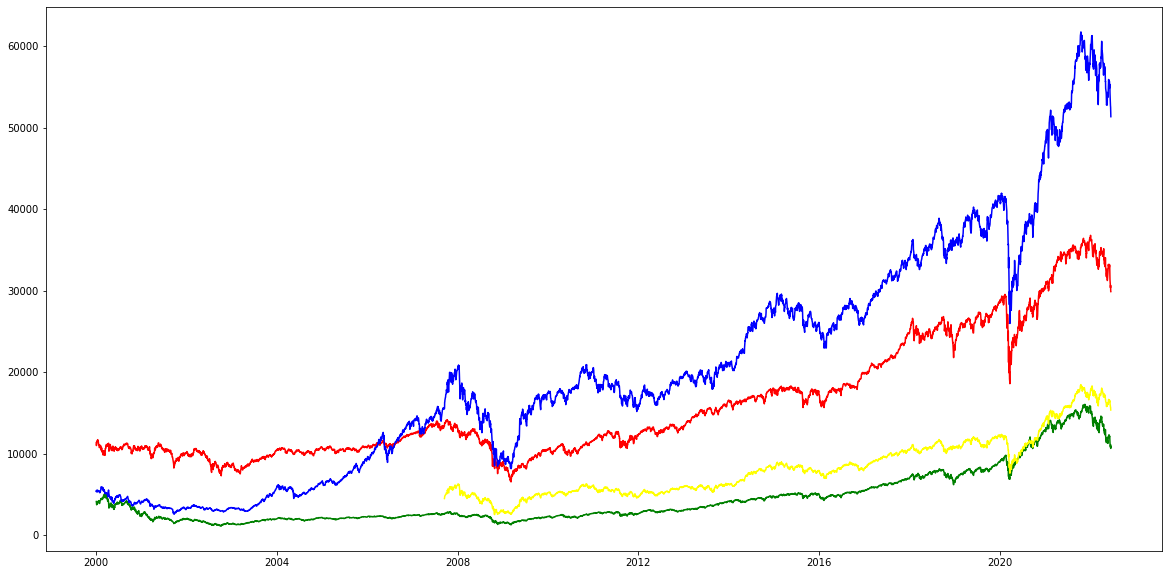

In [ ]:
from matplotlib.figure import Figure
fig = plt.figure(figsize =(20, 10))
plt.plot(X_dow,Y_dow,color='red',label='dow')
plt.plot(X_nasdaq,Y_nasdaq,color='green',label='nasdaq')
plt.plot(X_sensex,Y_sensex,color='blue',label='sensex')
plt.plot(X_nifty,Y_nifty,color='yellow',label='nifty')
plt.show

# Stock Prediction using LSTM
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
link = "https://raw.githubusercontent.com/DevanshRathiji/datasets/main/NSE-Tata-Global-Beverages-Limited.csv"
df = pd.read_csv(link)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


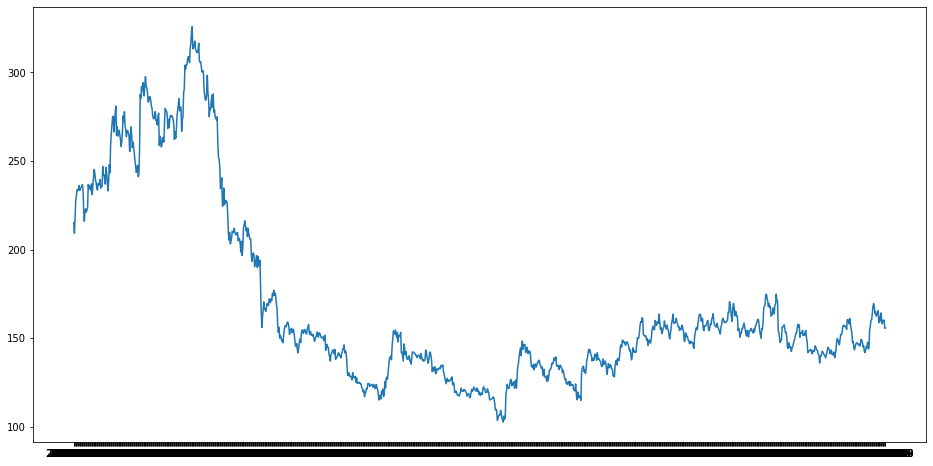

In [ ]:
#df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=str(data['Date'][i])
    new_dataset["Close"][i]=data["Close"][i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
#new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


927/927 - 28s - loss: 0.0013 - 28s/epoch - 30ms/step


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 [==============================] - 1s 19ms/step


<ipython-input-37-397e778e3e61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


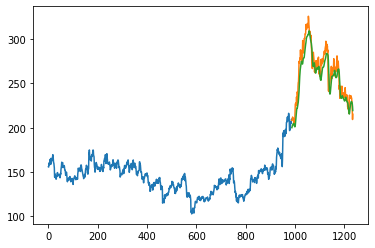

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [ ]:
predicted_closing_price

array([[200.00014],
       [201.15117],
       [202.04326],
       [202.79028],
       [203.69307],
       [204.30643],
       [204.59186],
       [204.74493],
       [204.32013],
       [203.34872],
       [202.00896],
       [201.52698],
       [200.97379],
       [201.09282],
       [202.99055],
       [206.44905],
       [210.33568],
       [214.0633 ],
       [216.978  ],
       [218.87866],
       [221.24219],
       [222.10567],
       [221.99286],
       [223.56758],
       [225.1568 ],
       [226.32814],
       [228.8546 ],
       [232.30745],
       [235.93513],
       [240.2976 ],
       [246.58359],
       [252.70227],
       [257.99664],
       [262.14767],
       [265.60526],
       [267.92587],
       [270.81122],
       [272.34558],
       [274.01172],
       [274.8996 ],
       [274.5871 ],
       [273.84338],
       [272.21832],
       [271.77353],
       [272.64752],
       [275.61243],
       [277.65033],
       [278.5086 ],
       [278.61084],
       [278.673  ],
